In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [2]:
# load the data including pressure and vecter fields of each point
# calculated and exported by COMSOL Multiphysics
#gridc.cod;uf_h.dat;vf_h.dat
#name=[Roc,Shelter,ADMS,prime,prime_roc]
#asp=[111,112]
name='prime_roc'; asp=112
df_x = './output/gridc.cod'; df_x=df_x.format(name,asp)
df_y = './output/gridc.cod'; df_y=df_y.format(name,asp)
df_z = './output/gridc.cod'; df_z=df_z.format(name,asp)
uf_h = './output/uf_h.dat';  uf_h=uf_h.format(name,asp)
vf_h = './output/vf_h.dat';  vf_h=vf_h.format(name,asp)

df_x = pd.read_csv(df_x, header=None,delim_whitespace=False,skiprows=1,  nrows=100 )
df_y = pd.read_csv(df_y, header=None,delim_whitespace=False,skiprows=102,nrows=70  )
df_z = pd.read_csv(df_z, header=None,delim_whitespace=False,skiprows=173,nrows=80  )
uf_h = pd.read_csv(uf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=8000)
vf_h = pd.read_csv(vf_h, header=None,delim_whitespace=False,skiprows=0,  nrows=8000)

In [3]:
## 定義域[-1, 1]のx, yを各区切りで生成
#x = np.linspace(-0.177000001,  0.416999996,100)
#y = np.linspace(-0.207000002,  0.207000002, 70)
#z = np.linspace(3.00000003E-03,0.476999998, 80)
#df_x=[]; df_z=[]
## メッシュグリッドを生成
#xv, zv = np.meshgrid(x, z)
#for xx,zz in zip(xv, zv):
#    for x,z in zip(xx, zz):
#        df_x.extend([x])
#        df_z.extend([z])
#df_x; df_z; uf_v; wf_v

In [4]:
width=16.670
x=np.array(df_x)*width
y=np.array(df_y)*width
u=np.array(uf_h)
v=np.array(vf_h)
#print(len(x),len(y),len(u),len(v))
print(x.shape,y.shape,u.shape,v.shape)

(100, 1) (70, 1) (8000, 1) (8000, 1)


In [5]:
# the lines and rows of the input array
#xlen = int(x.shape[0]**0.5)
#zlen = int(z.shape[0]**0.5)
#print(xlen,zlen)
xlen=x.shape[0]
ylen=y.shape[0]
print(xlen,ylen)

100 70


In [6]:
# make unique array from mesh-gridded input array
x_row = x[: xlen] #-1
y_row = y[: ylen]
#print(x_row);print(y_row)
print(x_row.shape, y_row.shape)

(100, 1) (70, 1)


ValueError: cannot reshape array of size 8000 into shape (70,100)

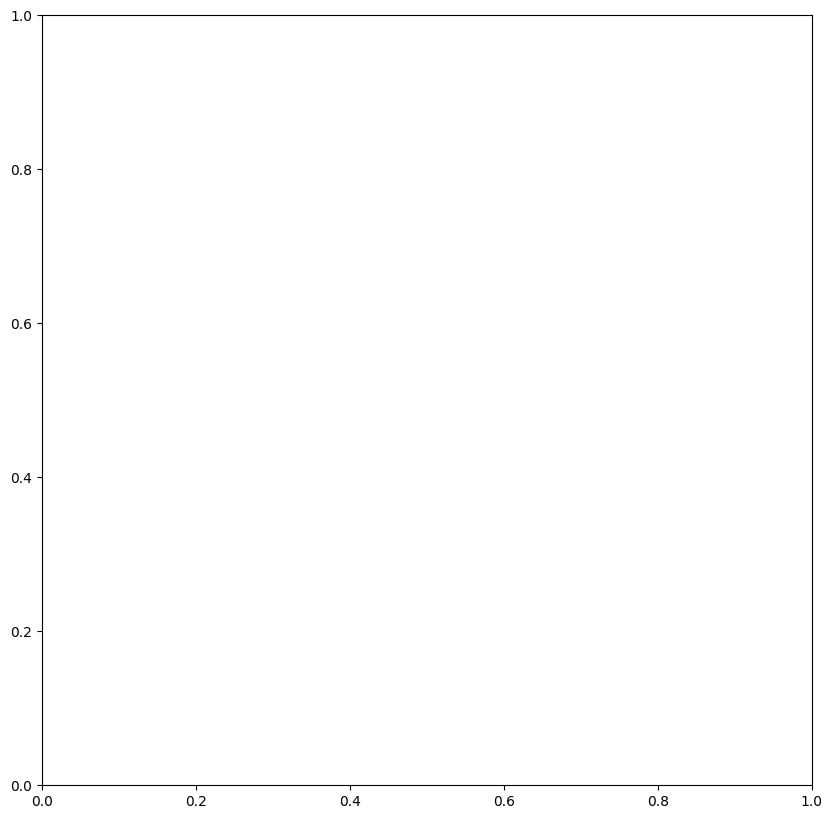

In [13]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
#ax1 = plt.axes()
ax.set_aspect('equal')

speed=(cont_u**2+cont_v**2)**0.5
minvel=0.0
maxvel=1.15
dev=3
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
#label_val=np.linspace(minvel,maxvel,dev)
#label_val=[0,0.2,0.4,0.6,0.8,1.0,1.2]

#x1=[-2, -0.5, 0.5, 1.18, 1.19, 1.2, 2.5]
#ng=80;dens=40; x1=[0.5, 1.25, 2.25]  #Roc     1:1:1
#ng=80;dens=40; x1=[0.5, 1.15, 2.45]  #Shelter 1:1:1
#ng=80;dens=40; x1=[0.5, 1.23, 2.08]  #ADMS 1:1:1
#ng=40;dens=80; x1=[0, 0.5, 1.25, 1.6, 3]  #prime   1:1:1
#ng=80;dens=40; x1=[0.5, 1.25, 2.18]  #prime_roc   1:1:1
#ng=80;dens=40; x1=[0.5, 1.24, 2.55]    #Roc     1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.55]    #Shelter 1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.40]  #ADMS    1:1:2
#ng=60;dens=80; x1=[0, 0.5, 1.25, 1.8, 3]   #prime  1:1:2
ng=80;dens=40; x1=[0.5, 1.45, 2.12]  #prime_roc   1:1:2
#ng=60;dens=80; x1=[1.35,1.8]  #test
#ng=3;dens=3; x1=[1.35,1.8]  #test

for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(-2,2,ng)
    seed_points =np.array([x1,y1])
    #add legend of Speed
#    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

    #matplotlib.pyplot.streamplot(x, y, u, v, density=1, linewidth=None, 
    #  color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
    #  minlength=0.1, transform=None, zorder=None, start_points=None, 
    #  maxlength=4.0, integration_direction='both', *, data=None)
    # draw the obstacle

# draw an obstacle
rectangle = patches.Rectangle(xy=(0.0,-0.5), width=1.0, height=1.0, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

# set aspect ratio to equal
#plt.axes().set_aspect("equal")
plt.axis([0, 6, -2, 2]) # [min_x,max_x,  min_y,max_y]
plt.xlabel('x/w', fontsize=15)
plt.ylabel('y/w', fontsize=15)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(0, 6.01, 1.) )
plt.yticks( np.arange(-2.01, 2.01, 1.) )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## adjust colorbar
#fig_coord = [0.91,0.1,0.01,0.80]
#cbar_ax = fig.add_axes(fig_coord)
#cbar = plt.colorbar(cax=cbar_ax)
#cbar_ax.set_ylim(minvel,maxvel)
#cbar.set_ticks(label_val)
#cbar.set_ticklabels(label_val)
#ticklabs = cbar.ax.get_yticklabels()
##cbar.ax.set_yticklabels(ticklabs,ha='right')
#cbar.ax.yaxis.set_tick_params(pad=10)  # your number may vary
#cbar.set_label("Speed [m/s]")

figname_b='wang_{0}_{1}_stream_h.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)

NameError: name 'cont_u' is not defined

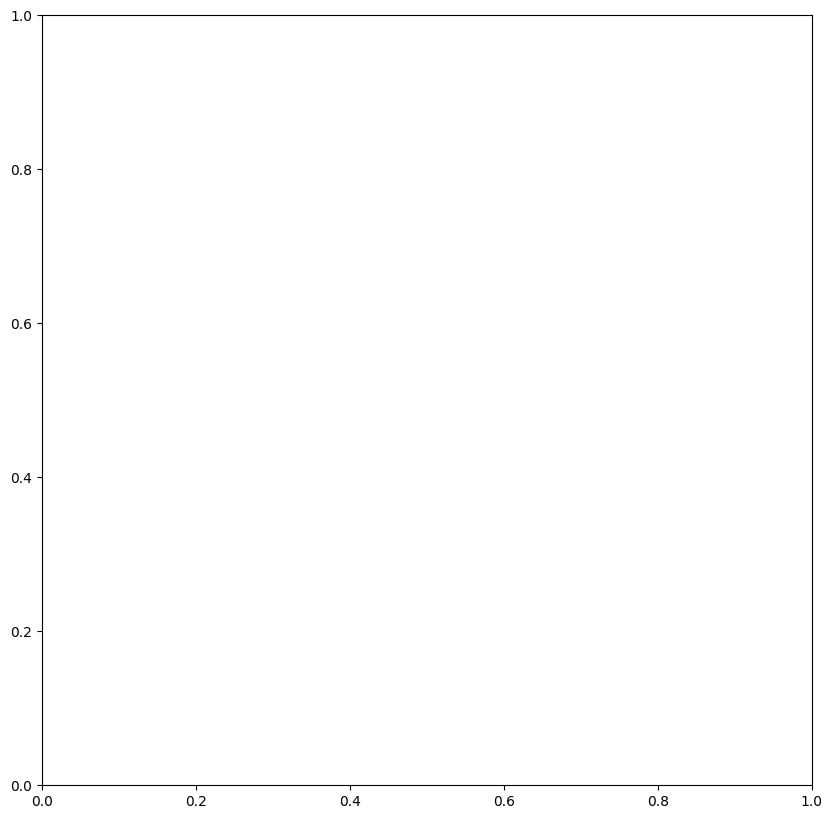

In [9]:
# plot the u_velocity data
fig = plt.figure(facecolor="w",figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

speed=(cont_u**2+cont_v**2)**0.5
minvel=0.0
maxvel=1.15
dev=3
label_val=np.linspace(minvel,maxvel,dev)
label_val=np.round(label_val, decimals=2)
#label_val=np.linspace(minvel,maxvel,dev)
#label_val=[0,0.2,0.4,0.6,0.8,1.0,1.2]

#x1=[-2, -0.5, 0.5, 1.18, 1.19, 1.2, 2.5]
#ng=80;dens=40; x1=[0.5, 1.25, 2.25]  #Roc     1:1:1
#ng=80;dens=40; x1=[0.5, 1.15, 2.45]  #Shelter 1:1:1
#ng=80;dens=40; x1=[0.5, 1.23, 2.08]  #ADMS 1:1:1
#ng=40;dens=80; x1=[0, 0.5, 1.25, 1.6, 3]  #prime   1:1:1
#ng=80;dens=40; x1=[0.5, 1.25, 2.18]  #prime_roc   1:1:1
ng=80;dens=40; x1=[0.5, 1.24, 2.55]    #Roc     1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.55]    #Shelter 1:1:2
#ng=80;dens=40; x1=[0.5, 1.25, 2.40]  #ADMS    1:1:2
#ng=60;dens=80; x1=[0, 0.5, 1.25, 1.8, 3]   #prime  1:1:2
#ng=80;dens=40; x1=[0.5, 1.45, 2.12]  #prime_roc   1:1:2
#ng=60;dens=80; x1=[1.35,1.8]  #test
for a in x1:
    x1 = [a for i in range(ng)]
    y1 = np.linspace(-2,2,ng)
    seed_points =np.array([x1,y1])
    #add legend of Speed
#    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
#                        color=speed, cmap='viridis', norm=None,
#                        arrowstyle='-',maxlength=50.0, 
#                        start_points=seed_points.T,integration_direction='both')
    # no legend
    strm=plt.streamplot(XX, YY, cont_u, cont_v, density=dens, linewidth=1, 
                        color='black', norm=None,
                        arrowstyle='-',maxlength=50.0, 
                        start_points=seed_points.T,integration_direction='both')

    #matplotlib.pyplot.streamplot(x, y, u, v, density=1, linewidth=None, 
    #  color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', 
    #  minlength=0.1, transform=None, zorder=None, start_points=None, 
    #  maxlength=4.0, integration_direction='both', *, data=None)
    # draw the obstacle

# draw an obstacle
rectangle = patches.Rectangle(xy=(0.0,-0.5), width=1.0, height=1.0, 
                              edgecolor='black', facecolor='gray', fill=True)
ax.add_patch(rectangle)

plt.axis([0.0, 4, -2, 2]) # [min_x,max_x,  min_y,max_y]
plt.xlabel('x/w')
plt.ylabel('y/w')
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#x軸小数点以下0桁表示
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))#y軸小数点以下0桁表示
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.xticks( np.arange(0, 4.01, 0.1), rotation=45)
plt.yticks( np.arange(-2.01, 2.01, 0.1) )


figname_b='wang_{0}_{1}_stream_h_0.1mesh.png'
figname=figname_b.format(name,asp)
plt.savefig(figname,bbox_inches="tight",pad_inches=0.02,dpi=250)